In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

import pandas as pd
from pathlib import Path
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib as mpl
from scipy import stats

import re

In [2]:
def get_intron_size(starts, ends, strand):
        intron_len = 0
        if len(ends) == 1:
            end = int(ends[0])
            if strand == "+":
                return end - start
            else: 
                return start - end
        #end = [int(x) for x in ends]
        if strand == "+":
            return max([int(x) - start  for x in ends])
        else:
            return max([start - int(x)  for x in ends])

In [3]:
def parse_sdFile_getdico_ratio(list_files):
    
    dico = {}
    
    for file in list_files:
    
        with open(file) as fi:
            for i in range(3):
                fi.readline()
            
            for l in fi:
                spt = l.strip().split('\t')
                if spt[5] == 'FBgn0267489':
                    continue
                ids = "_".join(spt[0:4])
                
                if ids not in dico:
                    dico[ids] = [int(spt[6]), int(spt[7]) ]# +  int(spt[8])]
                else:
                    dico[ids][0] += int(spt[6])
                    dico[ids][1] += int(spt[7]) # + int(spt[8])
    
    return dico

In [4]:
omnisplice_out_dir = Path("<Path to omnisplice (run with annotated Y genes gtf only) with sd file>")

dico_h = parse_sdFile_getdico_ratio(omnisplice_out_dir.glob("trimmed_sim_mau*.sd"))
dico_p = parse_sdFile_getdico_ratio(omnisplice_out_dir.glob("trimmed_mau*.sd"))

In [5]:
reg = re.compile("(.*)_(\d+)_(\d+)_([\+|\-])$")

In [6]:
ye = []
yl = []
auto_e = []
auto_l = []

for k, v in dico_h.items():
    try:
        m = reg.search(k)
        chr_ = m.group(1)
        start = m.group(2)
        end = m.group(3)
        strand = m.group(4)
        #(chr_, start, end, strand) = k.split("_")
    except:
        print(k)
        raise
    length = int(end) - int(start) if strand == "+" else int(start) - int(end)
    if v[0] < 30:
        continue
    r = v[0] / (v[0] + v[1])
    r = 100 * (1 - r)
    #if "Y" in chr_:
    ye.append(r)
    yl.append(length)


for k, v in dico_p.items():
    try:
        m = reg.search(k)
        chr_ = m.group(1)
        start = m.group(2)
        end = m.group(3)
        strand = m.group(4)
        #(chr_, start, end, strand) = k.split("_")
    except:
        print(k)
        raise
    length = int(end) - int(start) if strand == "+" else int(start) - int(end)
    if v[0] < 30:
        continue
    r = v[0] / (v[0] + v[1])
    r = 100 * (1 - r)
    #if "Y" in chr_:
    auto_e.append(r)
    auto_l.append(length)


In [ ]:


auto_l_log = [math.log(i) for i in auto_l ]
yl_log = [math.log(i) for i in yl]

#print(auto_l_log)
xX, xY, yY, yX  = np.array(auto_l_log), np.array(yl_log), np.array(ye), np.array(auto_e)

bins_xlog, bins_yX, bins_yY = [], [], []
previous_s = 0
maxX = max([max(xX), max(xY)])
pp = []
for i in range(4, int(maxX)+2):
    bins_yX.append(yX[(xX>=previous_s) & (xX<i)])
    bins_yY.append(yY[(xY>=previous_s) & (xY<i)])
    pp.append((previous_s, i))
    previous_s = i

In [10]:
bins_yX[-2] = np.append(bins_yX[-2], bins_yX[-1])
bins_yX = bins_yX[:-1]
bins_yY[-2] = np.append(bins_yY[-2], bins_yY[-1])
bins_yY = bins_yY[:-1]

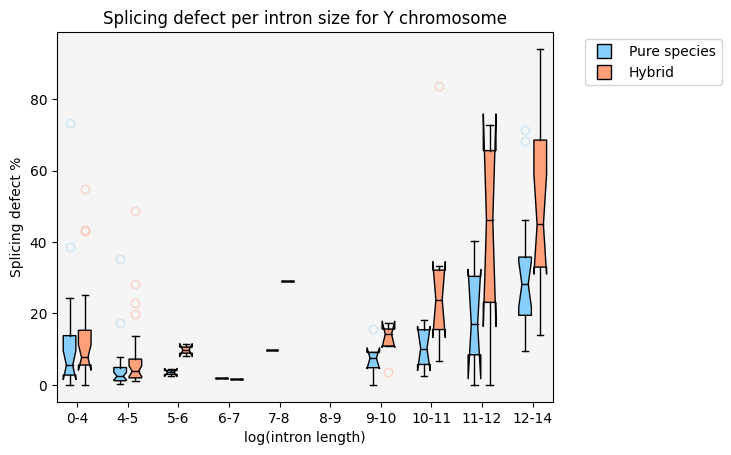

In [11]:
plt.boxplot(bins_yX, positions=range(1, len(pp)*2 - 2, 2), notch=True, patch_artist=True,
            boxprops=dict(facecolor="lightskyblue", color="k"),
            flierprops=dict(color="lightskyblue", markeredgecolor="lightskyblue",alpha=0.4),
            medianprops=dict(color="black"),);

plt.boxplot(bins_yY, positions=[x + 0.6 for x in range(1, len(pp)*2 - 2, 2)], notch=True,
            patch_artist=True,
            boxprops=dict(facecolor="lightsalmon", color="k"),
            flierprops=dict(color="lightsalmon", markeredgecolor="lightsalmon",alpha=0.4),
            medianprops=dict(color="black"),);

plt.ylabel("Splicing defect %")
plt.xlabel("log(intron length)")


handles, labels = plt.gca().get_legend_handles_labels()

point = [Line2D([0], [0], label='Pure species', marker='s', markersize=10, 
         markeredgecolor='k', markerfacecolor='lightskyblue', linestyle=''), 
        Line2D([0], [0], label='Hybrid', marker='s', markersize=10, 
         markeredgecolor='k', markerfacecolor='lightsalmon', linestyle='')]

handles.extend(point)

plt.xticks([x+0.3 for x in range(1, 20, 2)], labels=["0-4","4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "10-11", "11-12", "12-14"]);
plt.gca().set_facecolor("whitesmoke")
plt.legend(handles=handles,bbox_to_anchor=(1.05, 1), loc='upper left')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.title("Splicing defect per intron size for Y chromosome")
plt.show();
# uncomment to save
#plt.savefig("<path to output file>.pdf", bbox_inches='tight')

In [ ]:
# For the X chromosomes the code is almost the same we need to filter chrX

In [ ]:
def parse_sdFile_getdico_ratio(list_files):
    
    dico = {}
    
    for file in list_files:
    
        with open(file) as fi:
            for i in range(3):
                fi.readline()
            
            for l in fi:
                spt = l.strip().split('\t')
                if spt[0] != "NC_052525.2": # X chr
                    continue
                    
                if spt[5] == 'FBgn0267489':
                    continue
                ids = "_".join(spt[0:4])
                
                if ids not in dico:
                    dico[ids] = [int(spt[6]), int(spt[7]) ]# +  int(spt[8])]
                else:
                    dico[ids][0] += int(spt[6])
                    dico[ids][1] += int(spt[7]) # + int(spt[8])
    
    return dico

In [ ]:
omnisplice_out_dir = Path("<Path to omnisplice (run with annotated Y genes gtf only) with sd file>")

dico_h = parse_sdFile_getdico_ratio(omnisplice_out_dir.glob("trimmed_sim_mau*.sd"))
dico_p = parse_sdFile_getdico_ratio(omnisplice_out_dir.glob("trimmed_mau*.sd"))

In [ ]:
ye = []
yl = []
auto_e = []
auto_l = []

for k, v in dico_h.items():
    try:
        m = reg.search(k)
        chr_ = m.group(1)
        start = m.group(2)
        end = m.group(3)
        strand = m.group(4)
        #(chr_, start, end, strand) = k.split("_")
    except:
        print(k)
        raise
    length = int(end) - int(start) if strand == "+" else int(start) - int(end)
    if v[0] < 30:
        continue
    r = v[0] / (v[0] + v[1])
    r = 100 * (1 - r)
    #if "Y" in chr_:
    ye.append(r)
    yl.append(length)


for k, v in dico_p.items():
    try:
        m = reg.search(k)
        chr_ = m.group(1)
        start = m.group(2)
        end = m.group(3)
        strand = m.group(4)
        #(chr_, start, end, strand) = k.split("_")
    except:
        print(k)
        raise
    length = int(end) - int(start) if strand == "+" else int(start) - int(end)
    if v[0] < 30:
        continue
    r = v[0] / (v[0] + v[1])
    r = 100 * (1 - r)
    #if "Y" in chr_:
    auto_e.append(r)
    auto_l.append(length)


In [ ]:


auto_l_log = [math.log(i) for i in auto_l ]
yl_log = [math.log(i) for i in yl]

#print(auto_l_log)
xX, xY, yY, yX  = np.array(auto_l_log), np.array(yl_log), np.array(ye), np.array(auto_e)

bins_xlog, bins_yX, bins_yY = [], [], []
previous_s = 0
maxX = max([max(xX), max(xY)])
pp = []
for i in range(4, int(maxX)+2):
    bins_yX.append(yX[(xX>=previous_s) & (xX<i)])
    bins_yY.append(yY[(xY>=previous_s) & (xY<i)])
    pp.append((previous_s, i))
    previous_s = i

In [ ]:
plt.boxplot(bins_yX, positions=range(1, len(pp)*2, 2), notch=True, patch_artist=True,
            boxprops=dict(facecolor="lightskyblue", color="k"),
            flierprops=dict(color="lightskyblue", markeredgecolor="lightskyblue",alpha=0.4),
            medianprops=dict(color="black"),);

plt.boxplot(bins_yY, positions=[x + 0.6 for x in range(1, len(pp)*2, 2)], notch=True,
            patch_artist=True,
            boxprops=dict(facecolor="lightsalmon", color="k"),
            flierprops=dict(color="lightsalmon", markeredgecolor="lightsalmon",alpha=0.4),
            medianprops=dict(color="black"),);

plt.ylabel("Splicing defect %")
plt.xlabel("log(intron length)")


handles, labels = plt.gca().get_legend_handles_labels()

point = [Line2D([0], [0], label='Pure species', marker='s', markersize=10, 
         markeredgecolor='k', markerfacecolor='lightskyblue', linestyle=''), 
        Line2D([0], [0], label='Hybrid', marker='s', markersize=10, 
         markeredgecolor='k', markerfacecolor='lightsalmon', linestyle='')]

handles.extend(point)


plt.xticks([x+0.3 for x in range(1, 18, 2)], labels=["0-4","4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "10-11", "11-12"]);
plt.gca().set_facecolor("whitesmoke")
plt.legend(handles=handles,bbox_to_anchor=(1.05, 1), loc='upper left')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.title("Splicing defect per intron size for X chromosome")
plt.show();
# uncomment to save
#plt.savefig("<path to output file>.pdf", bbox_inches='tight')